<a href="https://colab.research.google.com/github/vini1lol/Havardx/blob/master/CaseStudy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
text = "this is my teste text. We are keeping this text short to keep things manageable"

In [0]:
def count_words(text):
  """
  Count the number of time each word occurs in text(str). Return a dictionary where
  key are unique word and values are word counts. Skip pontuation
  """
  text = text.lower()
  skips =[",",".",";",":","'",'"']
  for ch in skips:
    text = text.replace(ch,'')
  word_counts ={}
  for word in text.split(" "):
    if word in word_counts:
      word_counts[word] += 1
    else:
      word_counts[word] = 1
  return word_counts

In [6]:
count_words(text)

{'are': 1,
 'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'teste': 1,
 'text': 2,
 'things': 1,
 'this': 2,
 'to': 1,
 'we': 1}

In [0]:
from collections import Counter

In [0]:
def count_words_fast(text):
  """
  Count the number of time each word occurs in text(str). Return a dictionary where
  key are unique word and values are word counts. Skip pontuation
  """
  text = text.lower()
  skips =[",",".",";",":","'",'"']
  for ch in skips:
    text = text.replace(ch,'')
  word_counts =Counter(text.split(" "))
  return word_counts

In [9]:
count_words_fast(text)

Counter({'are': 1,
         'is': 1,
         'keep': 1,
         'keeping': 1,
         'manageable': 1,
         'my': 1,
         'short': 1,
         'teste': 1,
         'text': 2,
         'things': 1,
         'this': 2,
         'to': 1,
         'we': 1})

In [10]:
count_words(text) is count_words_fast(text)

False

In [0]:
def read_book(title_path):
  """
  Read a book and return it as a string
  """
  with open(title_path,"r",encoding="utf8") as current_file:
    text = current_file.read()
    text = text.replace("\n","").replace("\r","") 
  return text
  


In [0]:
text = read_book("/content/drive/My Drive/havardx/Using Python for Research/week 3/Os Maias.txt")

In [14]:
len(text)

1283905

In [15]:
ind = text.find('fila de janellinhas abrigadas á beira do telhado')
ind

2451

In [17]:
sample = text[ind:ind+1000]
sample

"fila de janellinhas abrigadas á beira do telhado, tinha o aspectotristonho de Residencia Ecclesiastica que competia a uma edificação doreinado da sr.^a D. Maria I: com uma sineta e com uma cruz no topoassimilhar-se-hia a um Collegio de Jesuitas. O nome de Ramalheteprovinha de certo d'um revestimento quadrado de azulejos fazendo painelno logar heraldico do Escudo d'Armas, que nunca chegara a ser collocado,e representando um grande ramo de girasoes atado por uma fita onde sedistinguiam letras e numeros d'uma data.Longos annos o Ramalhete permanecera deshabitado, com teias d'aranhapelas grades dos postigos terreos, e cobrindo-se de tons de ruina. Em1858 Monsenhor Buccarini, Nuncio de S. Santidade, visitara-o com idéad'installar lá a Nunciatura, seduzido pela gravidade clerical doedificio e pela paz dormente do bairro: e o interior do casarãoagradara-lhe tambem, com a sua disposição apalaçada, os tectosapainelados, as paredes cobertas de _frescos_ onde já desmaiavam asrosas das grinaldas 

In [0]:
def word_stats(word_counts):
  num_unique = len(word_counts)
  counts = word_counts.values()
  return (num_unique,counts)

In [0]:
word_counts = count_words_fast(text)
(num_unique,counts)=word_stats(word_counts)

In [20]:
num_unique

40665

In [21]:
sum(counts)

195771

In [0]:
import os
import pandas as pd

In [26]:
os.listdir("/content/drive/My Drive/havardx/Using Python for Research/week 3")

['Os Maias.txt',
 'DNA.txt',
 'protein.txt',
 'DNA.ipynb',
 'CaseStudy1Homework.ipynb',
 'CaseStudy2.ipynb',
 'Books_GerPort']

In [31]:
book_dir = "/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort"
stats = pd.DataFrame(columns=["language","author","title","length","unique"])
title_num = 1
for language in os.listdir(book_dir):
  for author in os.listdir(book_dir+"/"+language):
    for title in os.listdir(book_dir+"/"+language+"/"+author):
      inputfile = book_dir+"/"+language+"/"+author+"/"+title
      print(inputfile)
      text = read_book(inputfile)
      (num_unique,counts) = word_stats(count_words_fast(text))
      stats.loc[title_num]= language,author.capitalize(),title.replace(".txt",""),sum(counts),num_unique
      title_num += 1

/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/Livro de Consolação.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/Lagrimas Abenáoadas.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/Scenas Contemporaneas.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/O Regicida.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/O que fazem mulheres.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/O Olho de Vidro.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/Amor de Salvação.txt
/content/drive/My Drive/havardx/Using Python for Research/week 3/Books_GerPort/Portuguese/branco/Estrellas Prop°cias.txt
/content/drive/My Drive/havardx/Using Py

In [33]:
stats.head()

,language,author,title,length,unique
1,Portuguese,Branco,Livro de Consolação,54151,15871
2,Portuguese,Branco,Lagrimas Abenáoadas,45182,12622
3,Portuguese,Branco,Scenas Contemporaneas,48889,14395
4,Portuguese,Branco,O Regicida,50751,14779
5,Portuguese,Branco,O que fazem mulheres,41175,12316


In [0]:
import matplotlib.pyplot as plt


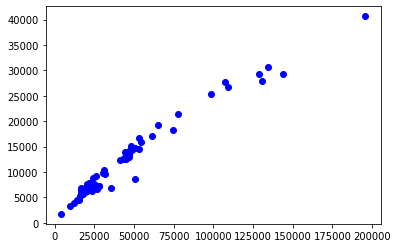

In [37]:
plt.plot(stats["length"],stats["unique"], "bo")

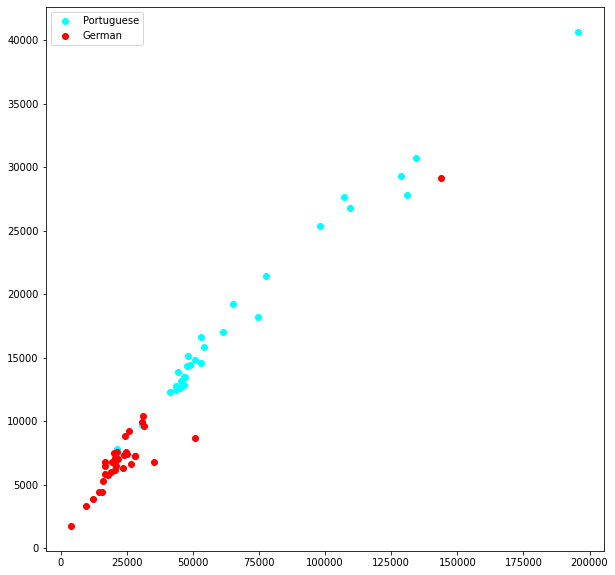

In [40]:
plt.figure(figsize=(10,10))
subset = stats[stats.language == "Portuguese"]
plt.plot(subset.length,subset.unique,"o",label="Portuguese",color="cyan")

subset = stats[stats.language == "German"]
plt.plot(subset.length,subset.unique,"o",label="German",color="r")
plt.legend()